# Load data of different format published by xcube server's STAC

This notebook shows an example how to load data of different format published by xcube server's STAC. 

### Setup
In order to run this notebook you need to install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac). You may install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac) directly from the git repository by cloning the repository, directing into `xcube-stac`, and following the steps below:

```bash
conda env create -f environment.yml
conda activate xcube-stac
pip install .
```

Note that [`xcube_stac`](https://github.com/xcube-dev/xcube-stac) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
from xcube.core.store import new_data_store, get_data_store_params_schema

First, we start the [xcube server](https://xcube.readthedocs.io/en/latest/examples/xcube_serve.html#running-the-server). Clone the [xcube repository](https://github.com/xcube-dev/xcube) and direct into the `xcube` directory. Run the server by tying the following command line in the terminal: 

```bash
"xcube serve -v -c examples/serve/demo/config.yml"
```

We can view the store parameters needed to initialize a STAC data store.

In [2]:
get_data_store_params_schema("stac")

<xarray.Dataset> Size: 400MB
Dimensions:                 (time: 5, lat: 1000, lon: 2000, bnds: 2)
Coordinates:
  * lat                     (lat) float64 8kB 52.5 52.5 52.49 ... 50.0 50.0
  * lon                     (lon) float64 16kB 0.00125 0.00375 ... 4.996 4.999
  * time                    (time) datetime64[ns] 40B 2017-01-16T10:09:21.834...
Dimensions without coordinates: bnds
Data variables:
    analytic_c2rcc_flags    (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_conc_chl       (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_conc_tsm       (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_kd489          (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_lat_bnds       (lat, bnds) float64 16kB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    analytic_lon_bnds       (lon, bnds) float64 32kB d

[Xcube server](https://xcube.readthedocs.io/en/latest/webapi.html#web-api-and-server) publishes a STAC catalog at `<base-url>/ogc`, with `<base-url>` defaulting to `127.0.0.1`. We therefore initiate a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework), where the `xcube-stac` plugin is recognized by setting the first argument to `"stac"` in the `new_data_store` function, and the url is set to `<base-url>/ogc`.

In [3]:
%%time
url = "http://127.0.0.1:8080/ogc"
store = new_data_store("stac", url=url)

CPU times: user 7.24 ms, sys: 319 µs, total: 7.56 ms
Wall time: 49 ms


The data IDs point to a [STAC item's JSON](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) and are specified by the segment of the URL that follows the catalog's URL. The data IDs can be obtained using the following code.

In [4]:
%%time
data_ids = store.list_data_ids()
data_ids

CPU times: user 9.46 ms, sys: 0 ns, total: 9.46 ms
Wall time: 46.3 ms


['collections/datacubes/items/local',
 'collections/datacubes/items/local_ts',
 'collections/datacubes/items/local_1w',
 'collections/datacubes/items/cog_local',
 'collections/datacubes/items/geotiff_local']

Now, we open a `.zarr` file. 

In [5]:
%%time
ds = store.open_data("collections/datacubes/items/local_ts")
ds

CPU times: user 26.2 ms, sys: 0 ns, total: 26.2 ms
Wall time: 32.6 ms


<xarray.Dataset> Size: 400MB
Dimensions:                 (time: 5, lat: 1000, lon: 2000, bnds: 2)
Coordinates:
  * lat                     (lat) float64 8kB 52.5 52.5 52.49 ... 50.0 50.0
  * lon                     (lon) float64 16kB 0.00125 0.00375 ... 4.996 4.999
  * time                    (time) datetime64[ns] 40B 2017-01-16T10:09:21.834...
Dimensions without coordinates: bnds
Data variables:
    analytic_c2rcc_flags    (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_conc_chl       (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_conc_tsm       (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_kd489          (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_lat_bnds       (lat, bnds) float64 16kB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    analytic_lon_bnds       (lon, bnds) float64 32kB dask.array<chunksize=(2000, 2), meta=np.ndarray>
    analytic_quality_flags  (time, lat, lon) float64 80MB dask.array<chunksize=(5, 100, 200), meta=np.ndarray>
    analytic_time_bnds      (time, bnds) datetime64[ns] 80B dask.array<chunksize=(5, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7

We plot the loaded data as an example below.

CPU times: user 488 ms, sys: 73.5 ms, total: 562 ms
Wall time: 763 ms


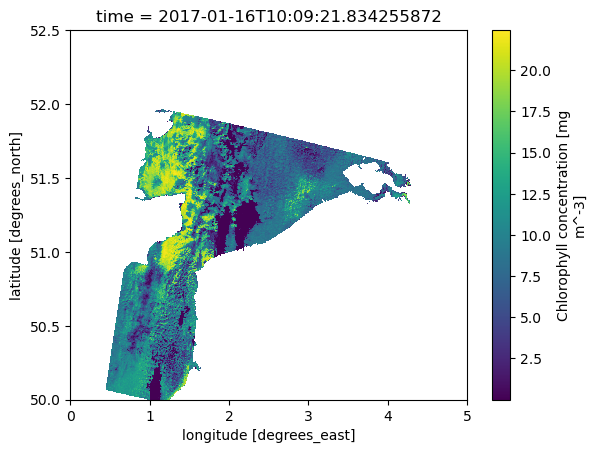

In [6]:
%%time
ds.analytic_conc_chl.isel(time=0).plot()

Next we will open a file stored in the xcube's [multi-resolution dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html) `.levels` format. 

Xcube server punlishes each data resource as a `xarray.DataSet` and as [multi-resolution dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html) with the asset names `"analytic"` and `"analytic_multires"`, respectively. If the parameter `asset_names` is not specified on the `open_data` method, `"analytic"` is selected as default and a `xarray.DataSet` is returned. 

In [7]:
%%time
ds = store.open_data("collections/datacubes/items/local")
ds

CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 38.4 ms


<xarray.Dataset> Size: 560MB
Dimensions:                 (time: 5, lat: 1000, lon: 2000, bnds: 2)
Coordinates:
  * lat                     (lat) float64 8kB 52.5 52.5 52.49 ... 50.0 50.0
  * lon                     (lon) float64 16kB 0.00125 0.00375 ... 4.996 4.999
  * time                    (time) datetime64[ns] 40B 2017-01-16T10:09:21.834...
Dimensions without coordinates: bnds
Data variables:
    analytic_c2rcc_flags    (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_chl_category   (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_chl_tsm_sum    (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_conc_chl       (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_conc_tsm       (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_kd489          (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_lat_bnds       (lat, bnds) float64 16kB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    analytic_lon_bnds       (lon, bnds) float64 32kB dask.array<chunksize=(2000, 2), meta=np.ndarray>
    analytic_quality_flags  (time, lat, lon) float64 80MB dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    analytic_time_bnds      (time, bnds) datetime64[ns] 80B dask.array<chunksize=(5, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7

Plotting the same `DataArray` as before will give the same plot as before, since both, the `.levels` and `.zarr` file was derived from the same dataset. (see [server example README.md](https://github.com/xcube-dev/xcube/blob/main/examples/serve/demo/README.md))

CPU times: user 307 ms, sys: 44.1 ms, total: 351 ms
Wall time: 356 ms


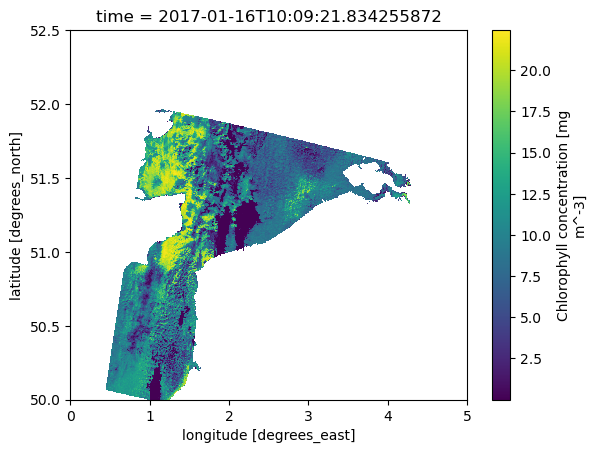

In [8]:
%%time
ds.analytic_conc_chl.isel(time=0).plot()

To access the multi-resolution dataset, assign the parameter `data_type` to `mldataset`.

In [11]:
%%time
mlds = store.open_data("collections/datacubes/items/local", data_type="mldataset")
mlds.num_levels

CPU times: user 27.1 ms, sys: 0 ns, total: 27.1 ms
Wall time: 53.3 ms


3

Now, we can access a dataset with lower resolution.

In [12]:
ds = mlds.get_dataset(2)
ds

ValueError: cannot rename 'lat_bnds' because it is not a variable or coordinate in this dataset

Next, we can open a cloud-optimized GeoTIFF file, which alos consists of multiple layers corresponding to multiple spatial resolutions. Also here, if no specfic asset name is given, the data resource will be presented as `xr.Dataset`.

In [13]:
%%time
ds = store.open_data("collections/datacubes/items/cog_local")
ds

CPU times: user 24.8 ms, sys: 92 µs, total: 24.9 ms
Wall time: 29.9 ms


<xarray.Dataset> Size: 3MB
Dimensions:               (y: 343, x: 343)
Coordinates:
  * x                     (x) float64 3kB 4.001e+05 4.004e+05 ... 5.096e+05
  * y                     (y) float64 3kB 4e+06 4e+06 ... 3.891e+06 3.89e+06
Data variables:
    analytic_band_1       (y, x) float64 941kB dask.array<chunksize=(343, 343), meta=np.ndarray>
    analytic_band_2       (y, x) float64 941kB dask.array<chunksize=(343, 343), meta=np.ndarray>
    analytic_band_3       (y, x) float64 941kB dask.array<chunksize=(343, 343), meta=np.ndarray>
    analytic_spatial_ref  int64 8B ...
Attributes:
    source:   file:///home/konstantin/bc_kon/01_coding/01_github/xcube/exampl...

CPU times: user 26.5 ms, sys: 3.86 ms, total: 30.4 ms
Wall time: 32.9 ms


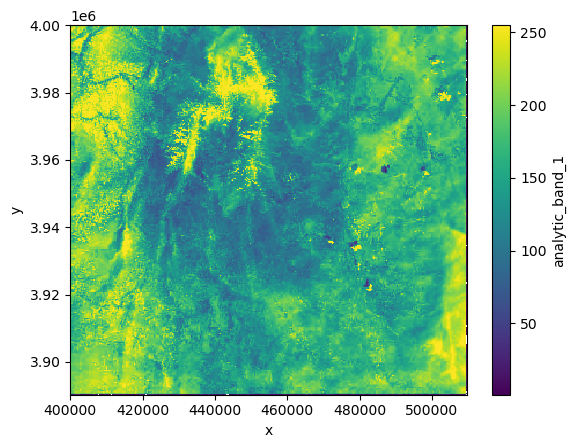

In [14]:
%%time
ds.analytic_band_1.plot()

To access the multi-resolution dataset, assign the parameter `data_type` to `"mldataset"`.

In [15]:
%%time
mlds = store.open_data("collections/datacubes/items/cog_local", data_type="mldataset")
mlds.num_levels

CPU times: user 34.6 ms, sys: 0 ns, total: 34.6 ms
Wall time: 58.7 ms


3

Now, we can access a dataset with lower resolution. Note that the variable names in the dataset consists of the asset name and the variable name given in the loaded data resource. 

In [16]:
%%time
ds = mlds.get_dataset(2)
ds

CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 20 ms


<xarray.Dataset> Size: 179kB
Dimensions:                        (y: 86, x: 86)
Coordinates:
  * x                              (x) float64 688B 4.006e+05 ... 5.091e+05
  * y                              (y) float64 688B 3.999e+06 ... 3.891e+06
Data variables:
    analytic_multires_band_1       (y, x) float64 59kB dask.array<chunksize=(86, 86), meta=np.ndarray>
    analytic_multires_band_2       (y, x) float64 59kB dask.array<chunksize=(86, 86), meta=np.ndarray>
    analytic_multires_band_3       (y, x) float64 59kB dask.array<chunksize=(86, 86), meta=np.ndarray>
    analytic_multires_spatial_ref  int64 8B ...
Attributes:
    source:   file:///home/konstantin/bc_kon/01_coding/01_github/xcube/exampl...

And we can plot the same image, but with the given lower resolution. 

CPU times: user 21.2 ms, sys: 349 µs, total: 21.5 ms
Wall time: 22.8 ms


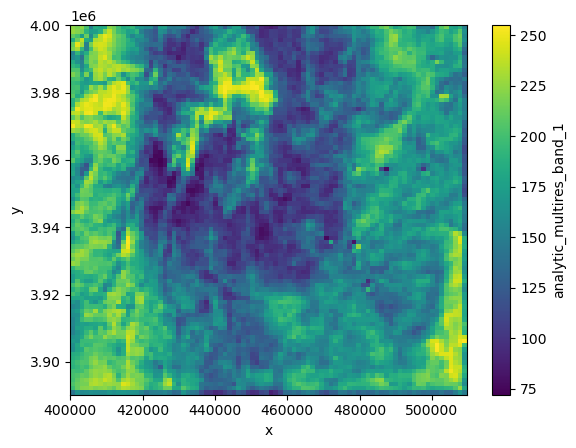

In [17]:
%%time
ds.analytic_multires_band_1.plot()